In [35]:
!pip install -q torchviz

5364.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [36]:
import torch
import matplotlib.pyplot as plt


In [37]:
# Create tensors with requires_grad=True
x = torch.tensor([2.0, 5.0], requires_grad=True)
y = torch.tensor([3.0, 7.0], requires_grad=True)

# Perform some operations
z = x * y + y**2

z.retain_grad() #By default intermediate layer weight updation is not shown.

# Compute the gradients
z_sum = z.sum().backward()


print(f"Gradient of x: {x.grad}")
print(f"Gradient of y: {y.grad}")
print(f"Gradient of z: {z.grad}")
print(f"Result of the operation: z = {z.detach()}")

Gradient of x: tensor([3., 7.])
Gradient of y: tensor([ 8., 19.])
Gradient of z: tensor([1., 1.])
Result of the operation: z = tensor([15., 84.])


In [38]:
from torchviz import make_dot

# Visualize the computation graph
dot = make_dot(z, params={"x": x, "y": y, "z" : z})
dot.render("grad_computation_graph", format="png")

'grad_computation_graph.png'

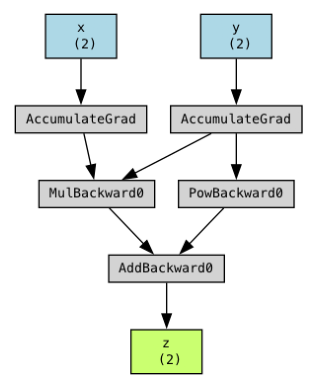

In [39]:
img = plt.imread("grad_computation_graph.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [40]:
print("Before detaching z from computation: ", z.requires_grad)
z_det = z.detach()
print("After detaching z from computation: ", z_det.requires_grad)

Before detaching z from computation:  True
After detaching z from computation:  False


In [41]:

x = torch.tensor(2.0, requires_grad=False)
y = torch.tensor(3.0, requires_grad=False)


# Perform simple operations
z = x * y + y**2


# Compute the gradients
z.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn